In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [3]:
# Load the dataset
data = pd.read_csv('survey_lung_cancer.csv', encoding='utf-8')


In [4]:
# Data Overview
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3309 non-null   object
 1   AGE                    3309 non-null   int64 
 2   SMOKING                3309 non-null   int64 
 3   YELLOW_FINGERS         3309 non-null   int64 
 4   ANXIETY                3309 non-null   int64 
 5   PEER_PRESSURE          3309 non-null   int64 
 6   CHRONIC DISEASE        3309 non-null   int64 
 7   FATIGUE                3309 non-null   int64 
 8   ALLERGY                3309 non-null   int64 
 9   WHEEZING               3309 non-null   int64 
 10  ALCOHOL CONSUMING      3309 non-null   int64 
 11  COUGHING               3309 non-null   int64 
 12  SHORTNESS OF BREATH    3309 non-null   int64 
 13  SWALLOWING DIFFICULTY  3309 non-null   int64 
 14  CHEST PAIN             3309 non-null   int64 
 15  LUNG_CANCER          

In [6]:
# Handling missing values using forward fill
data.fillna(method='ffill', inplace=True)

<ipython-input-6-9d1f2ad03f55>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Label encoding for categorical columns
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
# Splitting the dataset into features and target
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputing missing values (if needed)
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

In [9]:
# Initialize k-fold cross-validator
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [10]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Linear Regression": LinearRegression()
}


Evaluating Logistic Regression...
Accuracy: 0.9402
ROC AUC: 0.9640
Sensitivity: 0.9744
Specificity: 0.7023
Confusion Matrix:
[[ 29.3  12.4]
 [  7.4 281.8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.96      0.97      0.96       289

    accuracy                           0.94       330
   macro avg       0.87      0.83      0.85       330
weighted avg       0.93      0.94      0.93       330




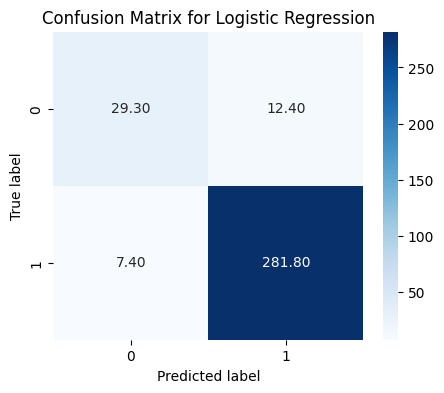


Evaluating Decision Tree...
Accuracy: 0.9544
ROC AUC: 0.9045
Sensitivity: 0.9727
Specificity: 0.8274
Confusion Matrix:
[[ 34.5   7.2]
 [  7.9 281.3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.98      0.98      0.98       289

    accuracy                           0.96       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.96      0.96      0.96       330




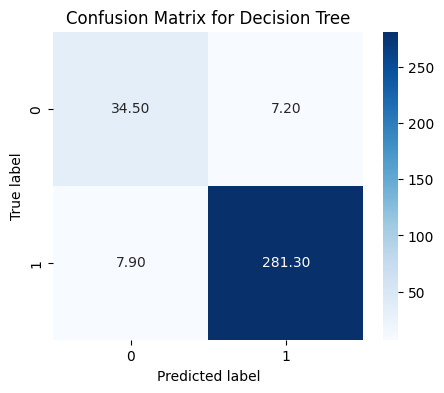


Evaluating Random Forest...
Accuracy: 0.9547
ROC AUC: 0.9820
Sensitivity: 0.9765
Specificity: 0.8032
Confusion Matrix:
[[ 33.5   8.2]
 [  6.8 282.4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.97      0.98      0.97       289

    accuracy                           0.95       330
   macro avg       0.89      0.88      0.89       330
weighted avg       0.95      0.95      0.95       330




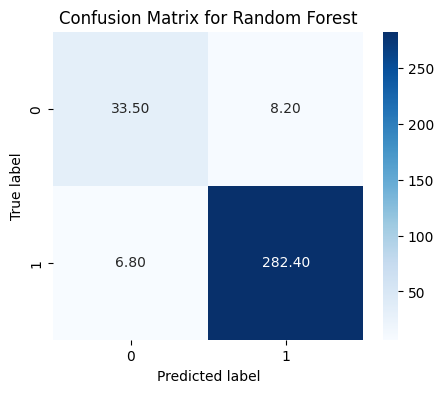


Evaluating Gradient Boosting...
Accuracy: 0.9550
ROC AUC: 0.9882
Sensitivity: 0.9789
Specificity: 0.7891
Confusion Matrix:
[[ 32.9   8.8]
 [  6.1 283.1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.98      0.98      0.98       289

    accuracy                           0.97       330
   macro avg       0.93      0.92      0.92       330
weighted avg       0.97      0.97      0.97       330




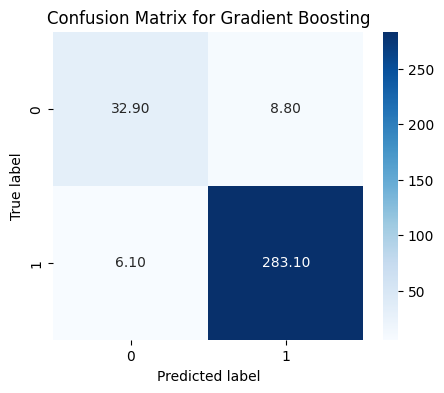


Evaluating XGBoost...
Accuracy: 0.9532
ROC AUC: 0.9880
Sensitivity: 0.9751
Specificity: 0.8009
Confusion Matrix:
[[ 33.4   8.3]
 [  7.2 282. ]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.97      0.99      0.98       289

    accuracy                           0.96       330
   macro avg       0.93      0.88      0.90       330
weighted avg       0.96      0.96      0.96       330




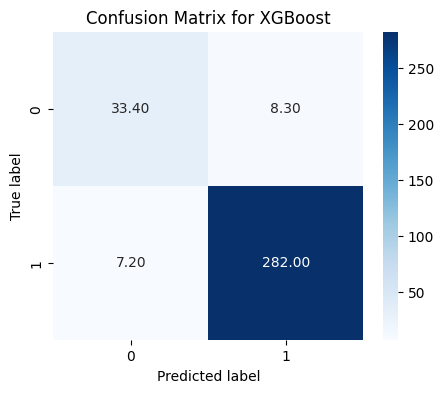


Evaluating SVM...
Accuracy: 0.9628
ROC AUC: 0.9850
Sensitivity: 0.9900
Specificity: 0.7743
Confusion Matrix:
[[ 32.3   9.4]
 [  2.9 286.3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.97      0.99      0.98       289

    accuracy                           0.96       330
   macro avg       0.95      0.87      0.91       330
weighted avg       0.96      0.96      0.96       330




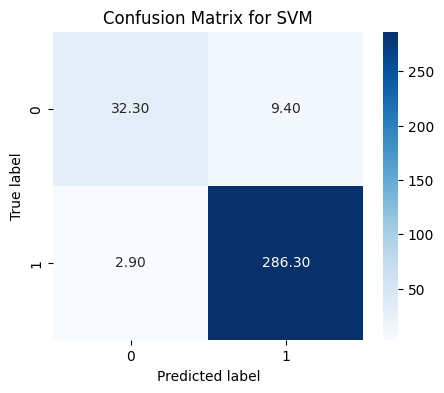


Evaluating Naive Bayes...
Accuracy: 0.9084
ROC AUC: 0.9389
Sensitivity: 0.9495
Specificity: 0.6238
Confusion Matrix:
[[ 26.   15.7]
 [ 14.6 274.6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.94      0.95      0.95       289

    accuracy                           0.91       330
   macro avg       0.79      0.77      0.78       330
weighted avg       0.90      0.91      0.90       330




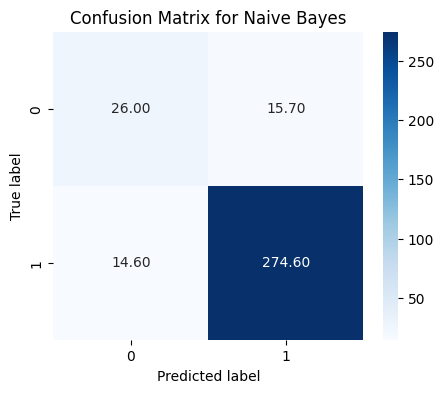


Evaluating Linear Regression...
Accuracy: 0.9275
ROC AUC: 0.9583
Sensitivity: 0.9775
Specificity: 0.5802
Confusion Matrix:
[[ 24.2  17.5]
 [  6.5 282.7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62        41
           1       0.94      0.97      0.95       289

    accuracy                           0.92       330
   macro avg       0.83      0.75      0.79       330
weighted avg       0.91      0.92      0.91       330




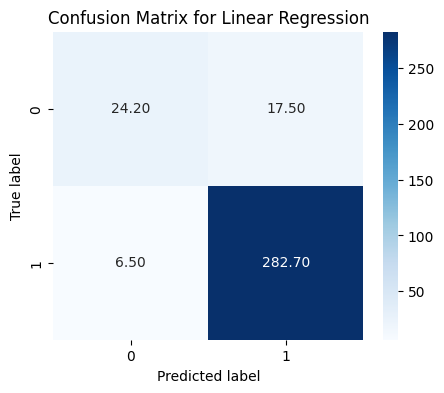

In [18]:
# Dictionary to store results
results = {}

# Loop through models and perform k-fold cross-validation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Lists to hold metrics for each fold
    accuracies, roc_aucs, sensitivities, specificities = [], [], [], []
    conf_matrices = np.zeros((2, 2))  # For accumulating confusion matrices

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        if model_name == "Linear Regression":
            y_pred = (model.predict(X_test) > 0.5).astype(int)
            y_pred_proba = model.predict(X_test)
        else:
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrices += conf_matrix

        # Compute accuracy, ROC AUC
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Sensitivity and Specificity
        TN, FP, FN, TP = conf_matrix.ravel()
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Save metrics
        accuracies.append(accuracy)
        roc_aucs.append(roc_auc)
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Save average results across all folds
    results[model_name] = {
        "accuracy": np.mean(accuracies),
        "roc_auc": np.mean(roc_aucs),
        "sensitivity": np.mean(sensitivities),
        "specificity": np.mean(specificities),
        "confusion_matrix": conf_matrices / kf.n_splits,
        "classification_report": classification_report(y_test, y_pred)
    }

    # Print results for the model
    print(f"Accuracy: {np.mean(accuracies):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f}")
    print(f"Sensitivity: {np.mean(sensitivities):.4f}")
    print(f"Specificity: {np.mean(specificities):.4f}")
    print(f"Confusion Matrix:\n{conf_matrices / kf.n_splits}\n")
    print(f"Classification Report:\n{results[model_name]['classification_report']}\n")

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrices / kf.n_splits, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

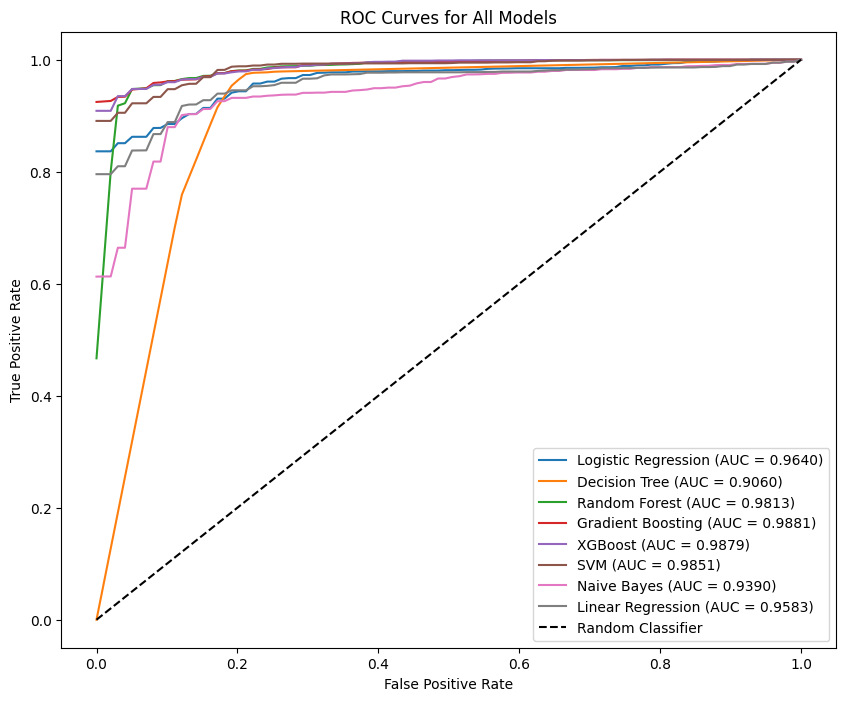

In [39]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))

# Variable to store mean False Positive Rate (FPR) and True Positive Rate (TPR) for each model
mean_fpr = np.linspace(0, 1, 100)

for model_name, model in models.items():
    tprs = []
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        # Calculate FPR and TPR based on model type
        if model_name == "Linear Regression":
            fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
        else:
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

        # Interpolate the TPR and store it for averaging
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    # Calculate mean TPR and plot ROC curve for the model
    mean_tpr = np.mean(tprs, axis=0)
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {auc(mean_fpr, mean_tpr):.4f})')

# Plot a diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()



In [28]:
import seaborn as sns
from sklearn.metrics import classification_report

# Initialize lists for deep learning model metrics
accuracies_dl, sensitivities_dl, specificities_dl, roc_aucs_dl = [], [], [], []
conf_matrices_dl = np.zeros((2, 2))  # Initialize for 2x2 confusion matrix

for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert target to categorical for ANN model
    y_train_dl = to_categorical(y_train)
    y_test_dl = to_categorical(y_test)

    # Build the ANN model
    dl_model = Sequential()
    dl_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    dl_model.add(Dropout(0.5))
    dl_model.add(Dense(64, activation='relu'))
    dl_model.add(Dropout(0.5))
    dl_model.add(Dense(32, activation='relu'))
    dl_model.add(Dense(2, activation='softmax'))

    # Compile the model
    dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    dl_model.fit(X_train, y_train_dl, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    score = dl_model.evaluate(X_test, y_test_dl, verbose=0)
    y_pred_dl = np.argmax(dl_model.predict(X_test), axis=1)
    conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)

    # Sensitivity and Specificity
    TN, FP, FN, TP = conf_matrix_dl.ravel()
    sensitivity_dl = TP / (TP + FN)
    specificity_dl = TN / (TN + FP)

    # ROC AUC
    fpr_dl, tpr_dl, _ = roc_curve(y_test, dl_model.predict(X_test)[:, 1])
    roc_auc_dl = roc_auc_score(y_test, dl_model.predict(X_test)[:, 1])

    # Save metrics
    accuracies_dl.append(score[1])
    sensitivities_dl.append(sensitivity_dl)
    specificities_dl.append(specificity_dl)
    roc_aucs_dl.append(roc_auc_dl)
    conf_matrices_dl += conf_matrix_dl



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
# Print Classification Report
print(f"\nClassification Report (Fold):")
print(classification_report(y_test, y_pred_dl))


Classification Report (Fold):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.99      0.98      0.98       289

    accuracy                           0.97       330
   macro avg       0.92      0.95      0.93       330
weighted avg       0.97      0.97      0.97       330



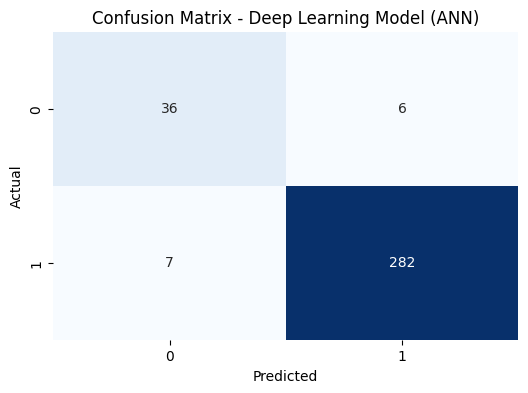

In [31]:
# Average confusion matrix over all folds
avg_conf_matrix_dl = conf_matrices_dl / kf.n_splits

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix_dl, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Deep Learning Model (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


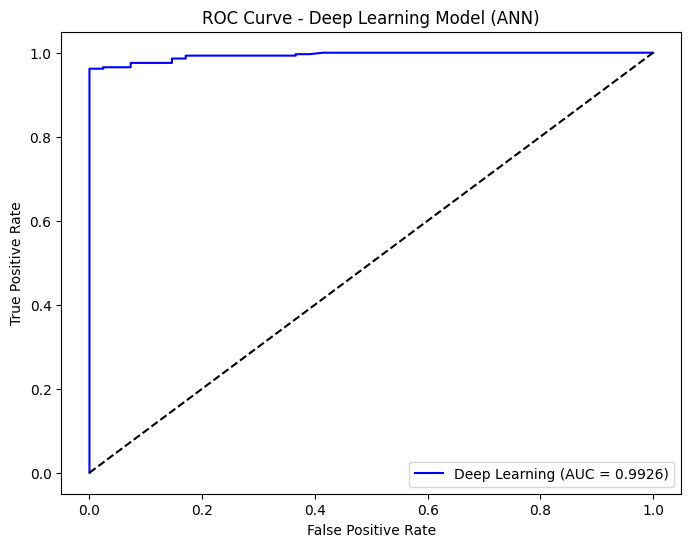

In [32]:
# Plot ROC curve for Deep Learning model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {np.mean(roc_aucs_dl):.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deep Learning Model (ANN)')
plt.legend(loc='best')
plt.show()


In [33]:
# Print overall results
print("\nAverage Deep Learning Model Results:")
print(f"Accuracy: {np.mean(accuracies_dl):.4f}")
print(f"Sensitivity: {np.mean(sensitivities_dl):.4f}")
print(f"Specificity: {np.mean(specificities_dl):.4f}")
print(f"ROC AUC: {np.mean(roc_aucs_dl):.4f}")



Average Deep Learning Model Results:
Accuracy: 0.9607
Sensitivity: 0.9761
Specificity: 0.8536
ROC AUC: 0.9926


In [34]:
# Compare All Models
comparison_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[model]["accuracy"] for model in results],
    "ROC AUC": [results[model]["roc_auc"] for model in results],
    "Sensitivity": [results[model]["sensitivity"] for model in results],
    "Specificity": [results[model]["specificity"] for model in results]
})

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy   ROC AUC  Sensitivity  Specificity
0  Logistic Regression  0.940162  0.964040     0.974415     0.702323
1        Decision Tree  0.954368  0.904502     0.972681     0.827352
2        Random Forest  0.954668  0.982017     0.976483     0.803194
3    Gradient Boosting  0.954975  0.988164     0.978912     0.789082
4              XGBoost  0.953160  0.987952     0.975103     0.800871
5                  SVM  0.962829  0.985034     0.989973     0.774332
6          Naive Bayes  0.908431  0.938851     0.949518     0.623751
7    Linear Regression  0.927468  0.958307     0.977528     0.580197
8        Deep Learning  0.958600  0.992627     0.975096     0.843902


<Figure size 1000x600 with 0 Axes>

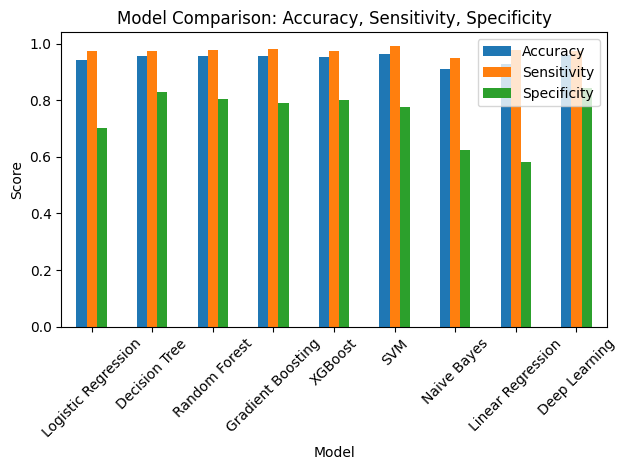

In [35]:
# Plot comparison of accuracy, sensitivity, and specificity
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model')[['Accuracy', 'Sensitivity', 'Specificity']].plot(kind='bar')
plt.title('Model Comparison: Accuracy, Sensitivity, Specificity')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
# Finding the best model based on ROC AUC
best_model_name = comparison_df['Model'][comparison_df['Accuracy'].idxmax()] # Get the model name corresponding to the maximum ROC AUC
best_model = models[best_model_name] if best_model_name != "Deep Learning" else dl_model

print(f"The best model is: {best_model_name} with Accuracy: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'Accuracy'].values[0]:.4f}")

The best model is: SVM with Accuracy: 0.9628


In [37]:
import pickle
with open('best_model_k_fold.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
